## Доработка задания

In [78]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

import os

from keras.models import Sequential
from keras.models import model_from_json
from keras.layers.core import Dense, Activation, Dropout
from keras.utils import np_utils
from keras.utils import to_categorical

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(10,5)})

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.shape

(90847, 771)

#### Смотрим на распределение классов

In [4]:
pd.value_counts(train['class_label'].values)

7     81399
4      2928
11     1220
5       954
6       822
1       631
9       563
0       531
8       505
10      428
12      308
3       252
13      180
2       126
dtype: int64

#### Препроцессинг двух фичей, которые сильно отличаются от остальных

In [5]:
train.iloc[:,-3] = np.log(train.iloc[:,-3])
train.iloc[:,-2] = np.log(train.iloc[:,-2])

In [7]:
X = train.iloc[:,:-1]
y = train.iloc[:, -1]

#### 2 функции для графиков

In [122]:
def visualize_acc():
    training_acc = training.history['acc']
    test_acc = training.history['val_acc']
    epoch_count = range(1, len(test_acc) + 1)
    plt.title('Acc')
    plt.plot(epoch_count, training_acc)
    plt.plot(epoch_count, test_acc)
    plt.legend(['Training Acc', 'Val Acc'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()

In [123]:
def visualize_loss():
    training_loss = training.history['loss']
    test_loss = training.history['val_loss']
    epoch_count = range(1, len(test_loss) + 1)
    plt.title('Loss')
    plt.plot(epoch_count, training_loss)
    plt.plot(epoch_count, test_loss)
    plt.legend(['Training Loss', 'Val Loss'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()

#### Пробуем kfold с разными значениями k

Fold 1
Train on 72677 samples, validate on 18170 samples
Epoch 1/10
72677/72677 [==============================] - 84s 1ms/step - loss: 0.1927 - acc: 0.9421 - val_loss: 0.1297 - val_acc: 0.9542
Epoch 2/10
72677/72677 [==============================] - 49s 679us/step - loss: 0.1213 - acc: 0.9575 - val_loss: 0.1330 - val_acc: 0.9525
Epoch 3/10
72677/72677 [==============================] - 49s 679us/step - loss: 0.1065 - acc: 0.9618 - val_loss: 0.1169 - val_acc: 0.9593
Epoch 4/10
72677/72677 [==============================] - 50s 684us/step - loss: 0.0937 - acc: 0.9657 - val_loss: 0.1180 - val_acc: 0.9587
Epoch 5/10
72677/72677 [==============================] - 50s 691us/step - loss: 0.0849 - acc: 0.9684 - val_loss: 0.1270 - val_acc: 0.9602
Epoch 6/10
72677/72677 [==============================] - 50s 693us/step - loss: 0.0783 - acc: 0.9709 - val_loss: 0.1297 - val_acc: 0.9578
Epoch 7/10
72677/72677 [==============================] - 51s 697us/step - loss: 0.0730 - acc: 0.9725 - val_los

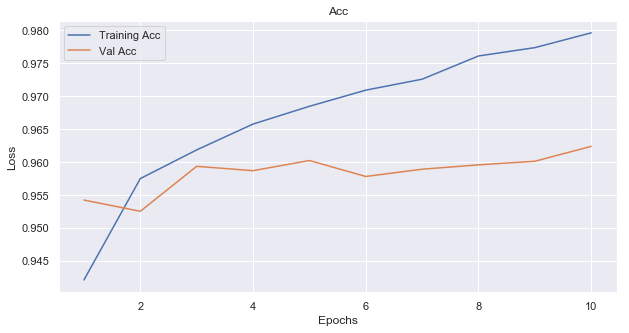

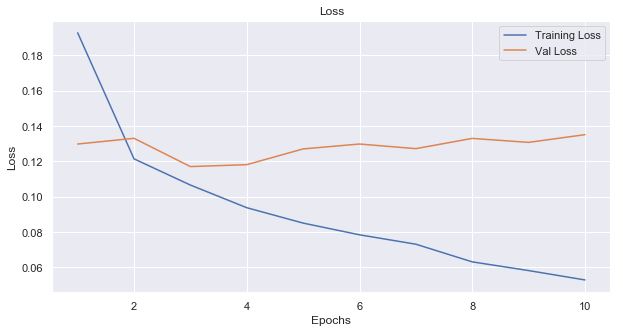

Fold 2
Train on 72677 samples, validate on 18170 samples
Epoch 1/10
72677/72677 [==============================] - 61s 833us/step - loss: 0.1924 - acc: 0.9413 - val_loss: 0.1263 - val_acc: 0.9578
Epoch 2/10
72677/72677 [==============================] - 49s 674us/step - loss: 0.1231 - acc: 0.9572 - val_loss: 0.1243 - val_acc: 0.9589
Epoch 3/10
72677/72677 [==============================] - 49s 675us/step - loss: 0.1066 - acc: 0.9618 - val_loss: 0.1145 - val_acc: 0.9605
Epoch 4/10
72677/72677 [==============================] - 49s 680us/step - loss: 0.0954 - acc: 0.9659 - val_loss: 0.1097 - val_acc: 0.9633
Epoch 5/10
72677/72677 [==============================] - 50s 681us/step - loss: 0.0846 - acc: 0.9683 - val_loss: 0.1202 - val_acc: 0.9623
Epoch 6/10
72677/72677 [==============================] - 49s 680us/step - loss: 0.0797 - acc: 0.9699 - val_loss: 0.1132 - val_acc: 0.9638
Epoch 7/10
72677/72677 [==============================] - 50s 683us/step - loss: 0.0707 - acc: 0.9736 - val_l

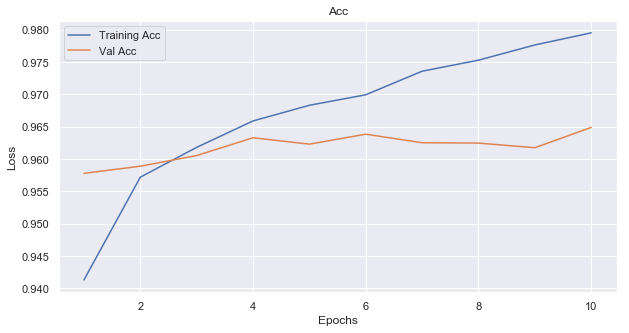

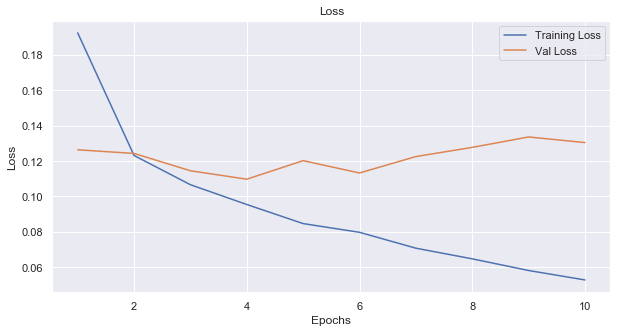

Fold 3
Train on 72678 samples, validate on 18169 samples
Epoch 1/10
72678/72678 [==============================] - 118s 2ms/step - loss: 0.2088 - acc: 0.9411 - val_loss: 0.1345 - val_acc: 0.9528
Epoch 2/10
72678/72678 [==============================] - 49s 677us/step - loss: 0.1201 - acc: 0.9580 - val_loss: 0.1149 - val_acc: 0.9614
Epoch 3/10
72678/72678 [==============================] - 50s 683us/step - loss: 0.1050 - acc: 0.9616 - val_loss: 0.1216 - val_acc: 0.9594
Epoch 4/10
72678/72678 [==============================] - 50s 687us/step - loss: 0.0954 - acc: 0.9650 - val_loss: 0.1174 - val_acc: 0.9605
Epoch 5/10
72678/72678 [==============================] - 50s 690us/step - loss: 0.0855 - acc: 0.9684 - val_loss: 0.1294 - val_acc: 0.9610
Epoch 6/10
72678/72678 [==============================] - 50s 692us/step - loss: 0.0787 - acc: 0.9703 - val_loss: 0.1261 - val_acc: 0.9613
Epoch 7/10
72678/72678 [==============================] - 50s 690us/step - loss: 0.0714 - acc: 0.9727 - val_lo

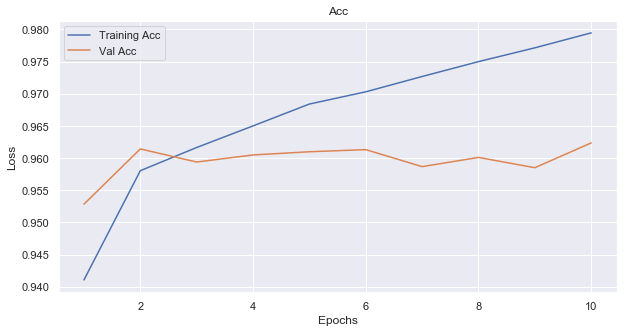

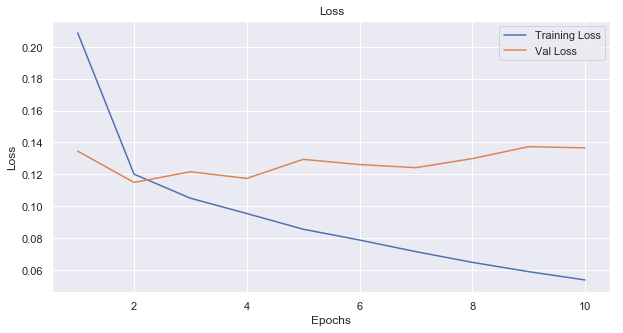

Fold 4
Train on 72678 samples, validate on 18169 samples
Epoch 1/10
72678/72678 [==============================] - 58s 794us/step - loss: 0.2057 - acc: 0.9400 - val_loss: 0.1329 - val_acc: 0.9537
Epoch 2/10
72678/72678 [==============================] - 51s 698us/step - loss: 0.1185 - acc: 0.9583 - val_loss: 0.1300 - val_acc: 0.9534
Epoch 3/10
72678/72678 [==============================] - 50s 687us/step - loss: 0.1043 - acc: 0.9629 - val_loss: 0.1267 - val_acc: 0.9565
Epoch 4/10
72678/72678 [==============================] - 50s 692us/step - loss: 0.0940 - acc: 0.9656 - val_loss: 0.1320 - val_acc: 0.9599
Epoch 5/10
72678/72678 [==============================] - 51s 699us/step - loss: 0.0836 - acc: 0.9689 - val_loss: 0.1402 - val_acc: 0.9570
Epoch 6/10
72678/72678 [==============================] - 51s 696us/step - loss: 0.0776 - acc: 0.9713 - val_loss: 0.1209 - val_acc: 0.9608
Epoch 7/10
72678/72678 [==============================] - 51s 695us/step - loss: 0.0716 - acc: 0.9729 - val_l

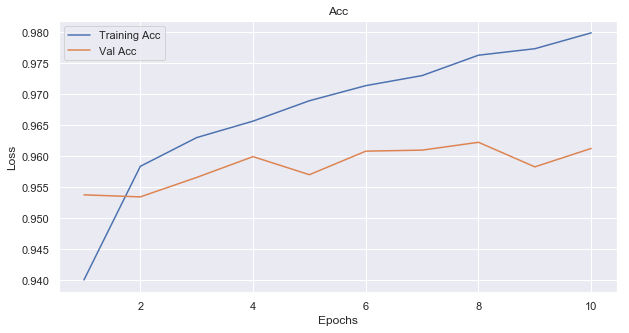

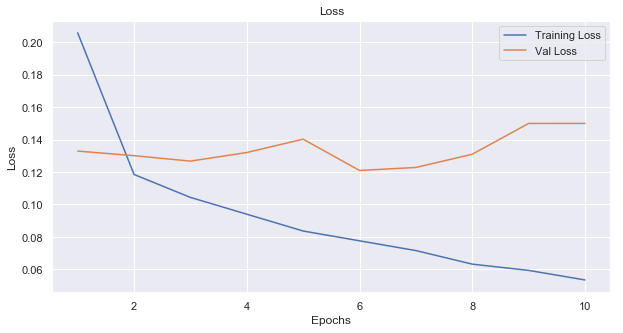

Fold 5
Train on 72678 samples, validate on 18169 samples
Epoch 1/10
72678/72678 [==============================] - 57s 780us/step - loss: 0.2741 - acc: 0.9392 - val_loss: 0.1523 - val_acc: 0.9453
Epoch 2/10
72678/72678 [==============================] - 51s 699us/step - loss: 0.1180 - acc: 0.9591 - val_loss: 0.1342 - val_acc: 0.9516
Epoch 3/10
72678/72678 [==============================] - 51s 697us/step - loss: 0.1035 - acc: 0.9623 - val_loss: 0.1211 - val_acc: 0.9586
Epoch 4/10
72678/72678 [==============================] - 52s 709us/step - loss: 0.0940 - acc: 0.9661 - val_loss: 0.1297 - val_acc: 0.9523
Epoch 5/10
72678/72678 [==============================] - 52s 716us/step - loss: 0.0851 - acc: 0.9685 - val_loss: 0.1260 - val_acc: 0.9593
Epoch 6/10
72678/72678 [==============================] - 51s 696us/step - loss: 0.0762 - acc: 0.9711 - val_loss: 0.1268 - val_acc: 0.9617
Epoch 7/10
72678/72678 [==============================] - 51s 695us/step - loss: 0.0702 - acc: 0.9734 - val_l

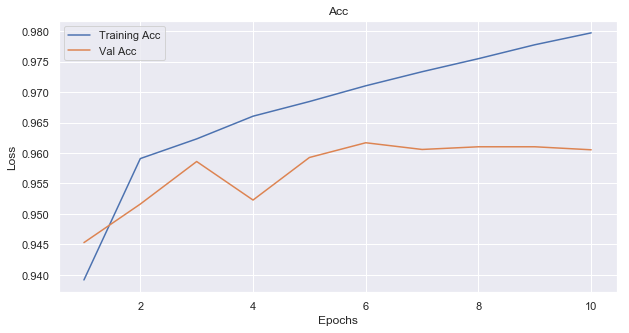

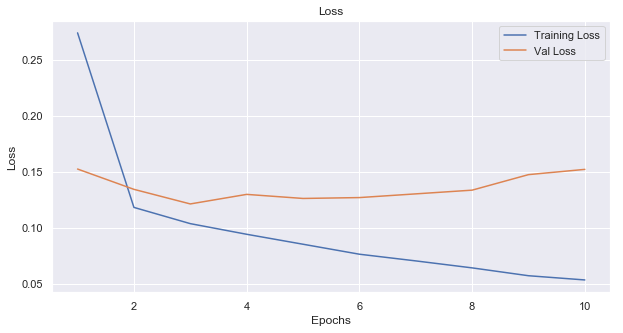

Mean acc = 96.23% (+/- 0.15%)


In [124]:
cvscores = []
cvloss = []
kf = KFold(n_splits=5, shuffle=True)
i = 1
for train, test in kf.split(X, y):
    print(f'Fold {i}')
    model = Sequential()
    model.add(Dense(770, activation='relu', input_dim = 770))
    model.add(Dropout(0.1))
    model.add(Dense(1540, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(14, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]
    Y_train = to_categorical(y_train)
    Y_test = to_categorical(y_test)
    training = model.fit(X_train, Y_train, epochs=10, batch_size=128, verbose=1, validation_data=(X_test, Y_test))    
    scores = model.evaluate(X_test, Y_test, verbose=1)
    print("Accuracy = ", scores[1]*100)
    cvscores.append(scores[1] * 100)
    i += 1
    visualize_acc()
    visualize_loss()
print("Mean acc = %.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

#### Сохранение модели, чтобы потом можно было загрузить готовую и не фитить заново

In [125]:
model_json = model.to_json()
with open("5fold.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("5fold.h5")
print("Model saved to disk")

Model saved to disk


#### Делаем предикт на тестовой выборке

In [126]:
test = pd.read_csv('test.csv')
test.iloc[:,-1] = np.log(test.iloc[:,-1])
test.iloc[:,-2] = np.log(test.iloc[:,-2])

In [127]:
y_pred = model.predict_classes(np.array(test))
pred = pd.DataFrame(y_pred)
pd.value_counts(pred[0])

7     40564
4      1357
11      599
5       471
6       368
9       264
1       248
8       213
0       197
10      188
12      137
3        72
13       36
2        33
Name: 0, dtype: int64

#### Теперь пробуем с другим значением разбиений

Fold 1
Train on 77868 samples, validate on 12979 samples
Epoch 1/10
77868/77868 [==============================] - 63s 809us/step - loss: 0.1894 - acc: 0.9427 - val_loss: 0.1258 - val_acc: 0.9559
Epoch 2/10
77868/77868 [==============================] - 52s 673us/step - loss: 0.1201 - acc: 0.9580 - val_loss: 0.1467 - val_acc: 0.9483
Epoch 3/10
77868/77868 [==============================] - 53s 680us/step - loss: 0.1059 - acc: 0.9625 - val_loss: 0.1158 - val_acc: 0.9612
Epoch 4/10
77868/77868 [==============================] - 53s 678us/step - loss: 0.0952 - acc: 0.9654 - val_loss: 0.1323 - val_acc: 0.9572
Epoch 5/10
77868/77868 [==============================] - 53s 685us/step - loss: 0.0867 - acc: 0.9679 - val_loss: 0.1100 - val_acc: 0.9642
Epoch 6/10
77868/77868 [==============================] - 53s 684us/step - loss: 0.0782 - acc: 0.9710 - val_loss: 0.1140 - val_acc: 0.9615
Epoch 7/10
77868/77868 [==============================] - 54s 690us/step - loss: 0.0711 - acc: 0.9732 - val_l

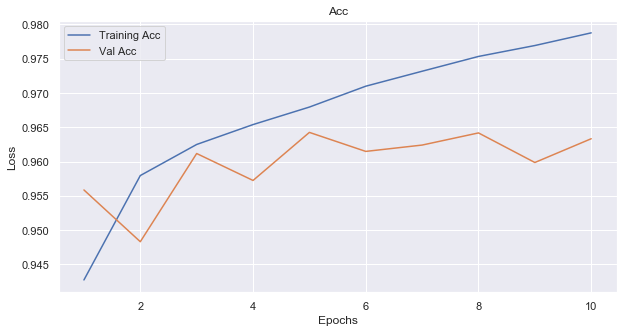

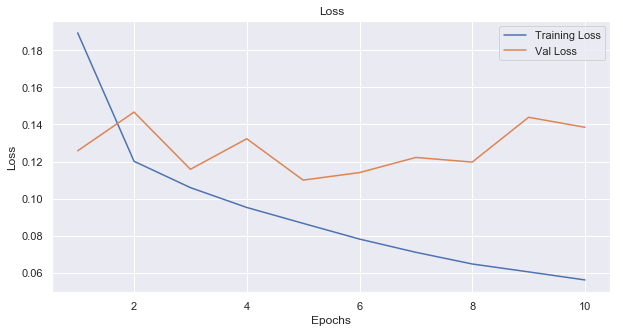

Fold 2
Train on 77869 samples, validate on 12978 samples
Epoch 1/10
77869/77869 [==============================] - 64s 824us/step - loss: 0.2005 - acc: 0.9429 - val_loss: 0.1319 - val_acc: 0.9548
Epoch 2/10
77869/77869 [==============================] - 54s 688us/step - loss: 0.1181 - acc: 0.9577 - val_loss: 0.1294 - val_acc: 0.9555
Epoch 3/10
77869/77869 [==============================] - 53s 685us/step - loss: 0.1046 - acc: 0.9624 - val_loss: 0.1289 - val_acc: 0.9558
Epoch 4/10
77869/77869 [==============================] - 54s 688us/step - loss: 0.0937 - acc: 0.9657 - val_loss: 0.1196 - val_acc: 0.9610
Epoch 5/10
77869/77869 [==============================] - 54s 688us/step - loss: 0.0849 - acc: 0.9686 - val_loss: 0.1259 - val_acc: 0.9590
Epoch 6/10
77869/77869 [==============================] - 54s 687us/step - loss: 0.0784 - acc: 0.9707 - val_loss: 0.1255 - val_acc: 0.9621
Epoch 7/10
77869/77869 [==============================] - 54s 691us/step - loss: 0.0718 - acc: 0.9726 - val_l

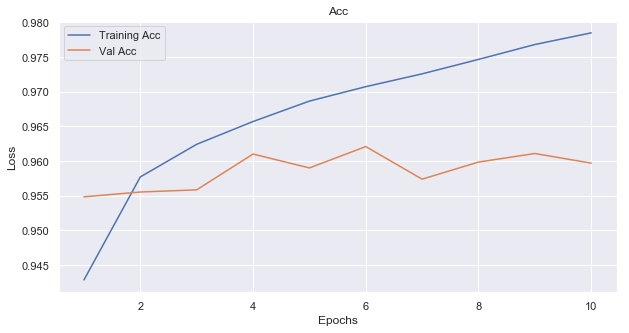

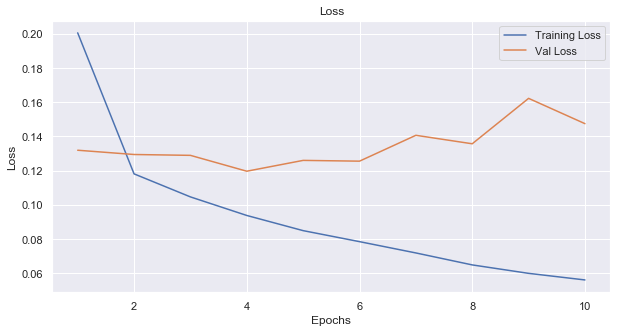

Fold 3
Train on 77869 samples, validate on 12978 samples
Epoch 1/10
77869/77869 [==============================] - 63s 803us/step - loss: 0.1912 - acc: 0.9426 - val_loss: 0.1225 - val_acc: 0.9587
Epoch 2/10
77869/77869 [==============================] - 53s 684us/step - loss: 0.1190 - acc: 0.9577 - val_loss: 0.1340 - val_acc: 0.9514
Epoch 3/10
77869/77869 [==============================] - 54s 694us/step - loss: 0.1054 - acc: 0.9619 - val_loss: 0.1074 - val_acc: 0.9636
Epoch 4/10
77869/77869 [==============================] - 54s 698us/step - loss: 0.0951 - acc: 0.9655 - val_loss: 0.1233 - val_acc: 0.9621
Epoch 5/10
77869/77869 [==============================] - 55s 702us/step - loss: 0.0869 - acc: 0.9675 - val_loss: 0.1210 - val_acc: 0.9615
Epoch 6/10
77869/77869 [==============================] - 55s 704us/step - loss: 0.0771 - acc: 0.9713 - val_loss: 0.1135 - val_acc: 0.9631
Epoch 7/10
77869/77869 [==============================] - 55s 704us/step - loss: 0.0722 - acc: 0.9720 - val_l

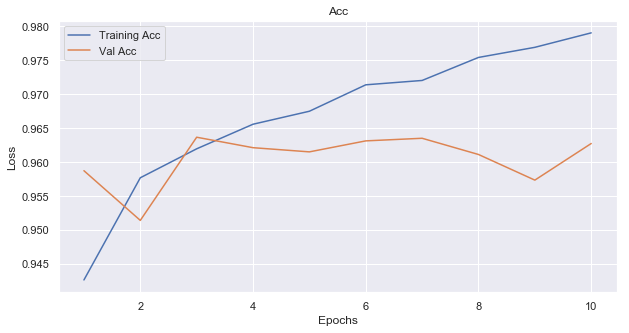

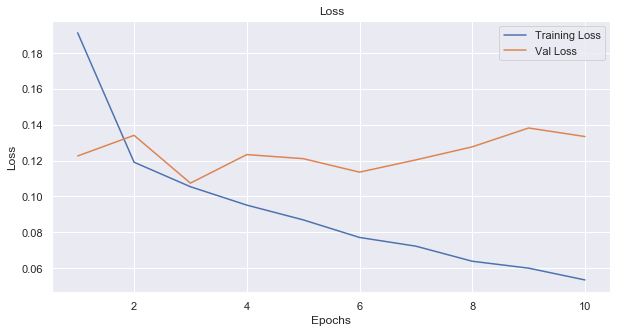

Fold 4
Train on 77869 samples, validate on 12978 samples
Epoch 1/10
  512/77869 [..............................] - ETA: 1:22:14 - loss: 1.4673 - acc: 0.7363

C:\ProgramData\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127466). Check your callbacks.
  % delta_t_median)


77869/77869 [==============================] - 87s 1ms/step - loss: 0.3037 - acc: 0.9392 - val_loss: 0.1323 - val_acc: 0.9565
Epoch 2/10
77869/77869 [==============================] - 55s 709us/step - loss: 0.1203 - acc: 0.9576 - val_loss: 0.1221 - val_acc: 0.9599
Epoch 3/10
77869/77869 [==============================] - 54s 695us/step - loss: 0.1051 - acc: 0.9621 - val_loss: 0.1134 - val_acc: 0.9617
Epoch 4/10
77869/77869 [==============================] - 55s 700us/step - loss: 0.0946 - acc: 0.9656 - val_loss: 0.1165 - val_acc: 0.9575
Epoch 5/10
77869/77869 [==============================] - 54s 697us/step - loss: 0.0870 - acc: 0.9674 - val_loss: 0.1282 - val_acc: 0.9572
Epoch 6/10
77869/77869 [==============================] - 55s 701us/step - loss: 0.0797 - acc: 0.9696 - val_loss: 0.1135 - val_acc: 0.9621
Epoch 7/10
77869/77869 [==============================] - 55s 701us/step - loss: 0.0734 - acc: 0.9721 - val_loss: 0.1277 - val_acc: 0.9622
Epoch 8/10
77869/77869 [================

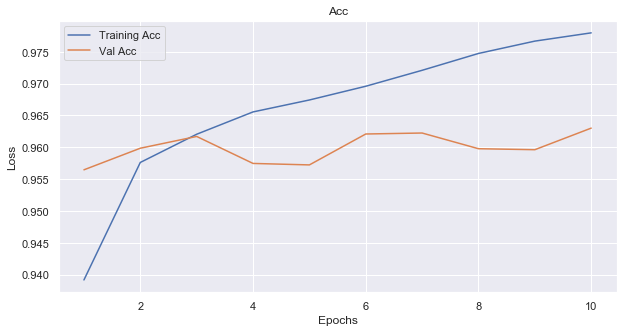

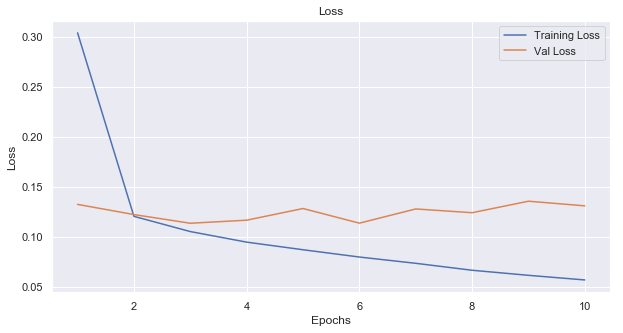

Fold 5
Train on 77869 samples, validate on 12978 samples
Epoch 1/10
77869/77869 [==============================] - 63s 805us/step - loss: 0.1966 - acc: 0.9419 - val_loss: 0.1385 - val_acc: 0.9500
Epoch 2/10
77869/77869 [==============================] - 53s 682us/step - loss: 0.1169 - acc: 0.9589 - val_loss: 0.1295 - val_acc: 0.9570
Epoch 3/10
77869/77869 [==============================] - 53s 687us/step - loss: 0.1057 - acc: 0.9618 - val_loss: 0.1253 - val_acc: 0.9571
Epoch 4/10
77869/77869 [==============================] - 53s 683us/step - loss: 0.0930 - acc: 0.9662 - val_loss: 0.1260 - val_acc: 0.9579
Epoch 5/10
77869/77869 [==============================] - 54s 690us/step - loss: 0.0863 - acc: 0.9681 - val_loss: 0.1229 - val_acc: 0.9596
Epoch 6/10
77869/77869 [==============================] - 54s 694us/step - loss: 0.0777 - acc: 0.9711 - val_loss: 0.1311 - val_acc: 0.9608
Epoch 7/10
77869/77869 [==============================] - 53s 687us/step - loss: 0.0717 - acc: 0.9725 - val_l

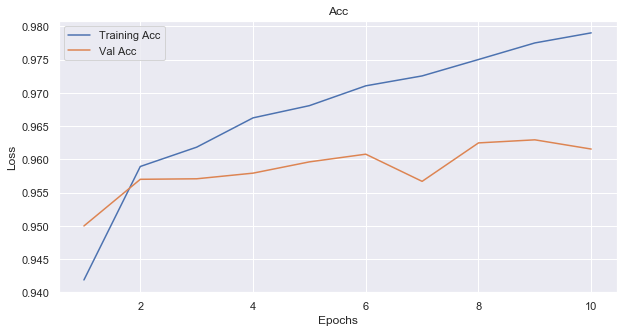

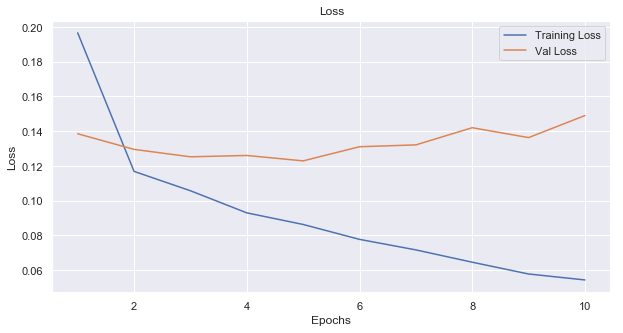

Fold 6
Train on 77869 samples, validate on 12978 samples
Epoch 1/10
77869/77869 [==============================] - 60s 776us/step - loss: 0.1894 - acc: 0.9424 - val_loss: 0.1336 - val_acc: 0.9527
Epoch 2/10
77869/77869 [==============================] - 54s 688us/step - loss: 0.1182 - acc: 0.9583 - val_loss: 0.1153 - val_acc: 0.9597
Epoch 3/10
77869/77869 [==============================] - 54s 688us/step - loss: 0.1050 - acc: 0.9619 - val_loss: 0.1199 - val_acc: 0.9577
Epoch 4/10
77869/77869 [==============================] - 54s 696us/step - loss: 0.0940 - acc: 0.9655 - val_loss: 0.1115 - val_acc: 0.9602
Epoch 5/10
77869/77869 [==============================] - 56s 718us/step - loss: 0.0855 - acc: 0.9682 - val_loss: 0.1132 - val_acc: 0.9620
Epoch 6/10
77869/77869 [==============================] - 54s 691us/step - loss: 0.0784 - acc: 0.9710 - val_loss: 0.1141 - val_acc: 0.9612
Epoch 7/10
77869/77869 [==============================] - 54s 690us/step - loss: 0.0699 - acc: 0.9735 - val_l

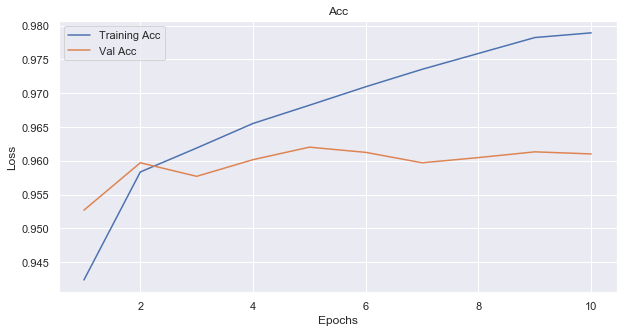

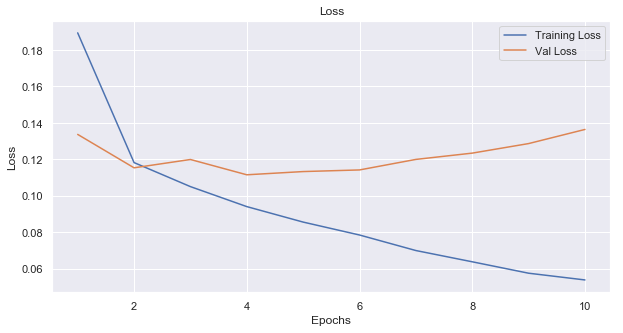

Fold 7
Train on 77869 samples, validate on 12978 samples
Epoch 1/10
77869/77869 [==============================] - 83s 1ms/step - loss: 1.6889 - acc: 0.8943 - val_loss: 1.6021 - val_acc: 0.9006
Epoch 2/10
77869/77869 [==============================] - 54s 690us/step - loss: 1.6886 - acc: 0.8952 - val_loss: 1.6021 - val_acc: 0.9006
Epoch 3/10
77869/77869 [==============================] - 54s 699us/step - loss: 1.6886 - acc: 0.8952 - val_loss: 1.6021 - val_acc: 0.9006
Epoch 4/10
77869/77869 [==============================] - 54s 700us/step - loss: 1.6886 - acc: 0.8952 - val_loss: 1.6021 - val_acc: 0.9006
Epoch 5/10
77869/77869 [==============================] - 54s 699us/step - loss: 1.6886 - acc: 0.8952 - val_loss: 1.6021 - val_acc: 0.9006
Epoch 6/10
77869/77869 [==============================] - 54s 691us/step - loss: 1.6886 - acc: 0.8952 - val_loss: 1.6021 - val_acc: 0.9006
Epoch 7/10
77869/77869 [==============================] - 54s 698us/step - loss: 1.6886 - acc: 0.8952 - val_los

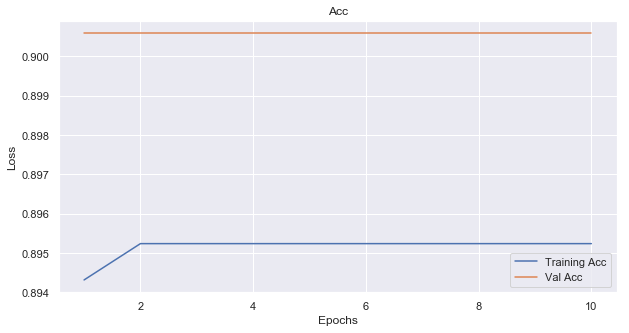

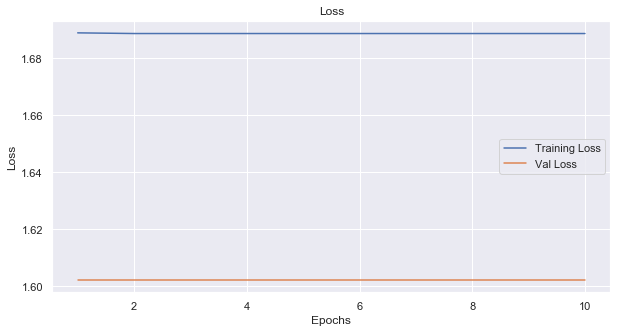

Mean acc = 95.31% (+/- 2.15%)


In [128]:
cvscores = []
cvloss = []
kf = KFold(n_splits=7, shuffle=True)
i = 1
for train, test in kf.split(X, y):
    print(f'Fold {i}')
    model = Sequential()
    model.add(Dense(770, activation='relu', input_dim = 770))
    model.add(Dropout(0.1))
    model.add(Dense(1540, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(14, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]
    Y_train = to_categorical(y_train)
    Y_test = to_categorical(y_test)
    training = model.fit(X_train, Y_train, epochs=10, batch_size=128, verbose=1, validation_data=(X_test, Y_test))    
    scores = model.evaluate(X_test, Y_test, verbose=1)
    print("Accuracy = ", scores[1]*100)
    cvscores.append(scores[1] * 100)
    i += 1
    visualize_acc()
    visualize_loss()
print("Mean acc = %.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

In [129]:
model_json = model.to_json()
with open("7fold.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("7fold.h5")
print("Model saved to disk")

Model saved to disk


#### Замечаем отклонение на 7 фолде

In [130]:
test = pd.read_csv('test.csv')
test.iloc[:,-1] = np.log(test.iloc[:,-1])
test.iloc[:,-2] = np.log(test.iloc[:,-2])

In [131]:
y_pred = model.predict_classes(np.array(test))
pred = pd.DataFrame(y_pred)
pd.value_counts(pred[0])

7    44747
Name: 0, dtype: int64

#### Видим, что тут имеет место явное переобучение, при большем значении k(например, 10) модель всегда ведёт себя так же на последнем фолде
#### Я пробовал различные k, при 5 получается самый оптимальный результат,
#### Не стал их сюда прикреплять из-за громоздкости вывода

#### Можно попробовать со значением k < 5

Fold 1
Train on 60564 samples, validate on 30283 samples
Epoch 1/10
60564/60564 [==============================] - 129s 2ms/step - loss: 0.2317 - acc: 0.9383 - val_loss: 0.1397 - val_acc: 0.9511
Epoch 2/10
60564/60564 [==============================] - 44s 734us/step - loss: 0.1204 - acc: 0.9569 - val_loss: 0.1304 - val_acc: 0.9561
Epoch 3/10
60564/60564 [==============================] - 44s 734us/step - loss: 0.1046 - acc: 0.9624 - val_loss: 0.1333 - val_acc: 0.9531
Epoch 4/10
60564/60564 [==============================] - 44s 726us/step - loss: 0.0944 - acc: 0.9646 - val_loss: 0.1283 - val_acc: 0.9581
Epoch 5/10
60564/60564 [==============================] - 44s 732us/step - loss: 0.0863 - acc: 0.9683 - val_loss: 0.1212 - val_acc: 0.9597
Epoch 6/10
60564/60564 [==============================] - 44s 727us/step - loss: 0.0794 - acc: 0.9702 - val_loss: 0.1338 - val_acc: 0.9575
Epoch 7/10
60564/60564 [==============================] - 44s 724us/step - loss: 0.0709 - acc: 0.9731 - val_lo

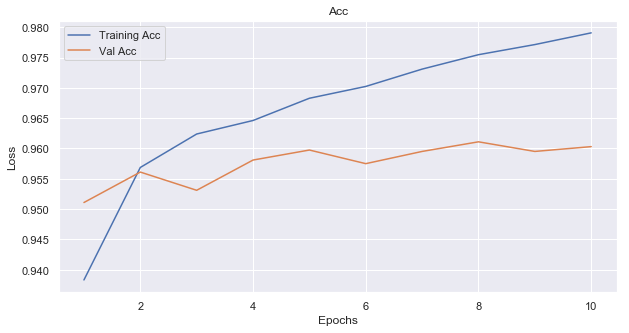

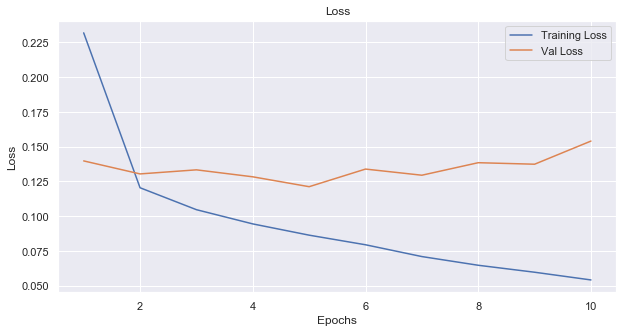

Fold 2
Train on 60565 samples, validate on 30282 samples
Epoch 1/10
60565/60565 [==============================] - 75s 1ms/step - loss: 0.2032 - acc: 0.9394 - val_loss: 0.1314 - val_acc: 0.9550
Epoch 2/10
60565/60565 [==============================] - 44s 724us/step - loss: 0.1231 - acc: 0.9571 - val_loss: 0.1156 - val_acc: 0.9596
Epoch 3/10
60565/60565 [==============================] - 43s 715us/step - loss: 0.1077 - acc: 0.9611 - val_loss: 0.1263 - val_acc: 0.9570
Epoch 4/10
60565/60565 [==============================] - 43s 713us/step - loss: 0.0973 - acc: 0.9646 - val_loss: 0.1153 - val_acc: 0.9604
Epoch 5/10
60565/60565 [==============================] - 43s 715us/step - loss: 0.0872 - acc: 0.9679 - val_loss: 0.1215 - val_acc: 0.9592
Epoch 6/10
60565/60565 [==============================] - 44s 721us/step - loss: 0.0789 - acc: 0.9710 - val_loss: 0.1231 - val_acc: 0.9595
Epoch 7/10
60565/60565 [==============================] - 44s 730us/step - loss: 0.0701 - acc: 0.9740 - val_los

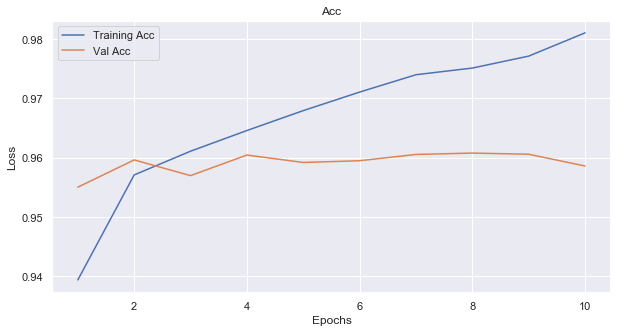

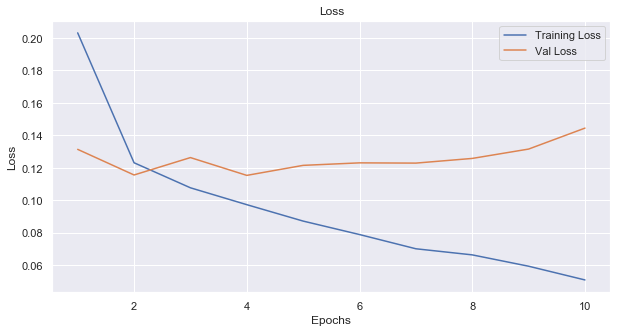

Fold 3
Train on 60565 samples, validate on 30282 samples
Epoch 1/10
60565/60565 [==============================] - 60s 992us/step - loss: 0.2144 - acc: 0.9381 - val_loss: 0.1280 - val_acc: 0.9560
Epoch 2/10
60565/60565 [==============================] - 44s 723us/step - loss: 0.1236 - acc: 0.9563 - val_loss: 0.1172 - val_acc: 0.9597
Epoch 3/10
60565/60565 [==============================] - 44s 730us/step - loss: 0.1076 - acc: 0.9616 - val_loss: 0.1230 - val_acc: 0.9580
Epoch 4/10
60565/60565 [==============================] - 45s 749us/step - loss: 0.0956 - acc: 0.9646 - val_loss: 0.1213 - val_acc: 0.9602
Epoch 5/10
60565/60565 [==============================] - 45s 741us/step - loss: 0.0865 - acc: 0.9674 - val_loss: 0.1176 - val_acc: 0.9599
Epoch 6/10
60565/60565 [==============================] - 45s 747us/step - loss: 0.0793 - acc: 0.9705 - val_loss: 0.1231 - val_acc: 0.9623
Epoch 7/10
60565/60565 [==============================] - 45s 739us/step - loss: 0.0732 - acc: 0.9724 - val_l

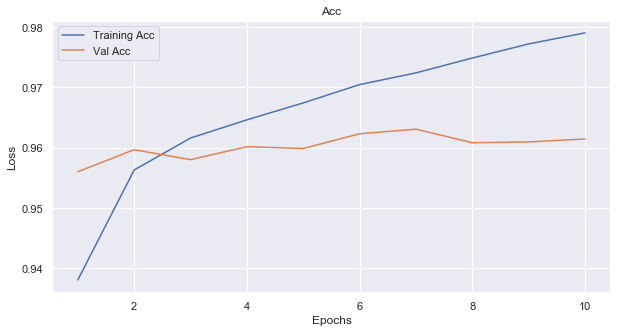

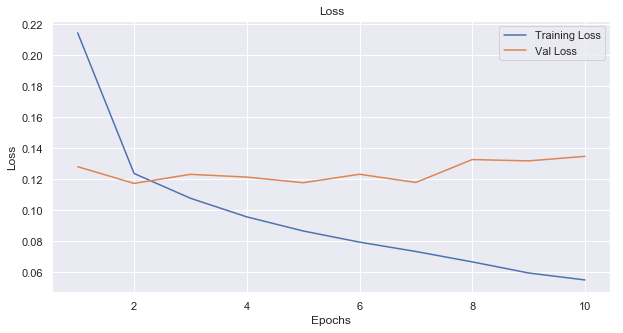

Mean acc = 96.01% (+/- 0.12%)


In [132]:
cvscores = []
cvloss = []
kf = KFold(n_splits=3, shuffle=True)
i = 1
for train, test in kf.split(X, y):
    print(f'Fold {i}')
    model = Sequential()
    model.add(Dense(770, activation='relu', input_dim = 770))
    model.add(Dropout(0.1))
    model.add(Dense(1540, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(14, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]
    Y_train = to_categorical(y_train)
    Y_test = to_categorical(y_test)
    training = model.fit(X_train, Y_train, epochs=10, batch_size=128, verbose=1, validation_data=(X_test, Y_test))    
    scores = model.evaluate(X_test, Y_test, verbose=1)
    print("Accuracy = ", scores[1]*100)
    cvscores.append(scores[1] * 100)
    i += 1
    visualize_acc()
    visualize_loss()
print("Mean acc = %.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

#### Видно, что средняя accuracy ниже при меньшем k, следовательно уменьшать ещё дальше смысла нет

#### Следовательно можно сделать вывод, что оптимальным является kfold при k = 5
#### А выбор архитектуры сети был сделан в прошлом сабмите, файл summary в этом же репозитории